### Travel Insurance Claim Prediction

#### Problem Description

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, the hackathon challenge is to analyze the available data and predict whether to sanction the insurance or not.

#### Dataset Description

A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 50553 customers and the test dataset consists of 12661 customers. Following are the features of the dataset

    Target: Claim Status (Claim)
    Name of agency (Agency)
    Type of travel insurance agencies (Agency.Type)
    Distribution channel of travel insurance agencies (Distribution.Channel)
    Name of the travel insurance products (Product.Name)
    Duration of travel (Duration)
    Destination of travel (Destination)
    Amount of sales of travel insurance policies (Net.Sales)
    The commission received for travel insurance agency (Commission)
    Gender of insured (Gender)
    Age of insured (Age)


In [47]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
dataframe=pd.read_csv('data/train.csv')
dftest=pd.read_csv('data/test.csv')

In [24]:
dataframe.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


#### Percentage of null values in columns

In [25]:
dataframe.isnull().sum()/len(dataframe)*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [26]:
dftest.isnull().sum()/len(dftest)*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.526736
Age                      0.000000
dtype: float64

#### Null values in gender column replaced by mode value for that column

In [27]:
dataframe['Gender'].fillna(dataframe['Gender'].mode()[0], inplace=True)
dataframe['Gender'].fillna(dataframe['Gender'].mode()[0], inplace=True)

In [28]:
dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)
dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)

#### Separating categorical and continuous data for EDA

In [29]:
dataframe_con = dataframe.select_dtypes(include=np.number)
dataframe_cat = dataframe.select_dtypes(exclude=np.number)

In [30]:
dftest_con = dftest.select_dtypes(include=np.number)
dftest_cat = dftest.select_dtypes(exclude=np.number)

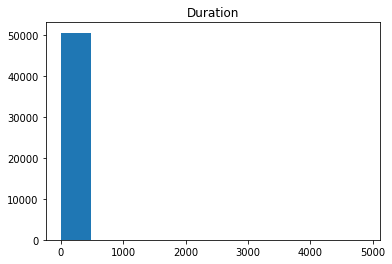

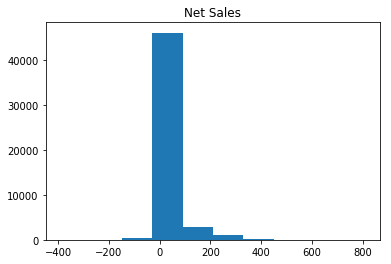

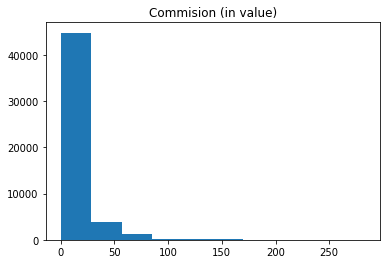

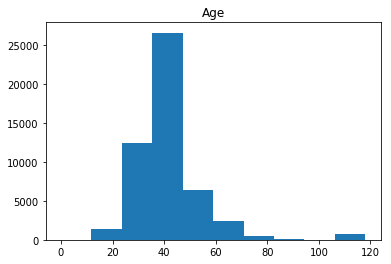

In [43]:
for i in dataframe_con.iloc[:,2:]:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

In [61]:
dataframe_con.drop(['Duration'],1,inplace=True)

In [62]:
dftest_con.drop(['Duration'],1,inplace=True)

C:\Users\shami\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,ID,0.000141
1,Claim,8.076976
2,Duration,22.872064
3,Net Sales,3.328144
4,Commision (in value),4.078068
5,Age,2.978390


#### Removing Claim and ID from the continuous dataframe 

In [46]:
dataframe_con = dataframe_con.drop(['Claim','ID'],axis=1)

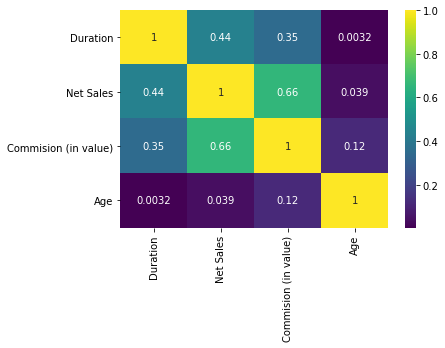

In [48]:
sns.heatmap(dataframe_con.corr(),cmap='viridis',annot=True)

In [49]:
le = LabelEncoder()
for col in dataframe_cat:
    dataframe_cat[col] = le.fit_transform(dataframe_cat[col])
     

dataframe_cat.head()

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,6,1,1,16,56,1
1,7,1,1,10,79,1
2,6,1,1,16,56,1
3,7,1,1,1,38,1
4,7,1,1,10,47,1


In [50]:
le = LabelEncoder()
for col in dftest_cat:
    dftest_cat[col] = le.fit_transform(dftest_cat[col])
     

dftest_cat.head()

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,6,1,1,16,36,1
1,7,1,1,1,79,1
2,7,1,1,1,100,1
3,7,1,1,1,17,1
4,7,1,1,10,79,1


In [63]:
dftest_con.columns

Index(['ID', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

In [64]:
new_dataframe = pd.concat([dataframe_con,dataframe_cat],axis=1,ignore_index=True)

In [65]:
new_dftest = pd.concat([dftest_con,dftest_cat],axis=1,ignore_index=True)

In [67]:
new_dataframe.columns=['Net Sales', 'Commision (in value)', 'Age','Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination','Gender',]

In [68]:
new_dftest.columns=['ID','Net Sales', 'Commision (in value)','Age','Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination','Gender']

In [69]:
new_dftest.head()

,ID,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,25902,49.5,29.7,47,6,1,1,16,36,1
1,19535,20.0,0.0,24,7,1,1,1,79,1
2,43717,20.0,0.0,36,7,1,1,1,100,1
3,48271,28.0,0.0,36,7,1,1,1,17,1
4,52318,11.0,0.0,36,7,1,1,10,79,1


In [79]:
X = new_dataframe
y = dataframe['Claim']

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [74]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
newX_train=pca.transform(X_train)
newX_test=pca.transform(X_test)

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=11, max_depth=4, random_state=0)
gb.fit(newX_train, y_train)

y_pred_gb = gb.predict(newX_test)

# accuracy
accuracy = gb.score(newX_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_gb)
print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_gb))
print("Precision = " ,precision_score(y_test, y_pred_gb))
print("Recall = " ,recall_score(y_test, y_pred_gb))
print("F1 Score = " ,f1_score(y_test, y_pred_gb))

print(classification_report(y_test,y_pred_gb))

AUC_ROC score is  0.5062286417046193
Accuracy is  0.9843734546533478
Precision =  0.5
Recall =  0.012658227848101266
F1 Score =  0.02469135802469136
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9953
           1       0.50      0.01      0.02       158

    accuracy                           0.98     10111
   macro avg       0.74      0.51      0.51     10111
weighted avg       0.98      0.98      0.98     10111



In [82]:
y_pred_gb = gb.predict(new_dftest.drop(['ID'],axis=1))

In [83]:
output = pd.DataFrame({'ID':new_dftest['ID'],'Claim':y_pred_gb})

In [84]:
output.head()

,ID,Claim
0,25902,1
1,19535,1
2,43717,1
3,48271,1
4,52318,1


In [44]:
output.to_csv(path_or_buf = r'C:\Users\Akshatha\Downloads\geeks_submit.csv',index=False)